In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout, RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomBrightness, Rescaling, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
tf.__version__

'2.19.0'

In [8]:
SEED = 42
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32

In [9]:
train_dataset = image_dataset_from_directory(
    "dogandcat/training_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.25,
    subset="training",
    seed=SEED
)
val_dataset = image_dataset_from_directory(
    "dogandcat/training_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True,
    validation_split=0.25,
    subset="validation",
    seed=SEED
)
test_dataset = image_dataset_from_directory(
    "dogandcat/test_set",
    labels="inferred",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True
)

Found 8005 files belonging to 2 classes.
Using 6004 files for training.
Found 8005 files belonging to 2 classes.
Using 2001 files for validation.
Found 2023 files belonging to 2 classes.


In [10]:
class_names = train_dataset.class_names
print(f"Classes: {class_names}")

Classes: ['cats', 'dogs']


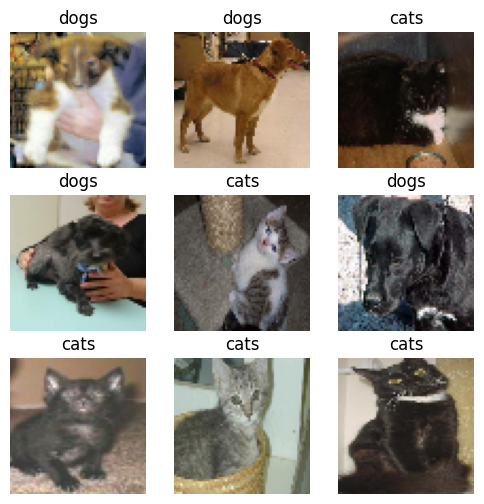

In [11]:
plt.figure(figsize=(6, 6))

for images, labels in train_dataset.take(2):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

In [ ]:
model = Sequential([
    Input(shape=(64, 64, 3)),

    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),
    RandomBrightness(0.2),

    Rescaling(1./255),

    Conv2D(filters = 16, kernel_size=(3,3), activation="relu", padding = 'same'),
    Conv2D(filters = 16, kernel_size=(3,3), activation="relu", padding = 'same'),
    MaxPool2D(pool_size = (2,2)),

    Conv2D(filters = 32, kernel_size=(3,3), activation="relu", padding = 'same'),
    Conv2D(filters = 32, kernel_size=(3,3), activation="relu", padding = 'same'),
    MaxPool2D(pool_size = (2,2)),

    Conv2D(filters = 64, kernel_size=(3,3), activation="relu", padding = 'same'),
    Conv2D(filters = 64, kernel_size=(3,3), activation="relu", padding = 'same'),
    MaxPool2D(pool_size = (2,2)),

    Conv2D(filters = 128, kernel_size=(3,3), activation="relu", padding = 'same'),
    Conv2D(filters = 128, kernel_size=(3,3), activation="relu", padding = 'same'),
    MaxPool2D(pool_size = (2,2)),

    Dropout(.3),

    Conv2D(filters = 256, kernel_size=(3,3), activation="relu", padding = 'same'),
    Conv2D(filters = 256, kernel_size=(3,3), activation="relu", padding = 'same'),
    MaxPool2D(pool_size = (2,2)),
    Dropout(.3),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(.5),
    Dense(2, activation='softmax'),

])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 64, 64, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_1               │ (None, 64, 64, 3)      │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness_1             │ (None, 64, 64, 3)      │             0 │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,225 (2.61 MB)

 Trainable params: 683,777 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
loss = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001,beta_1=0.9, beta_2=0.999,epsilon=1e-07)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000, seed=SEED).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000, seed=SEED).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
      

history = model.fit(x = train_dataset, validation_data=val_dataset, epochs=20, callbacks=[early_stopping])

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.5709 - loss: 1.0508 - val_accuracy: 0.5617 - val_loss: 0.9276 - learning_rate: 0.0100
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.6408 - loss: 0.8816 - val_accuracy: 0.6082 - val_loss: 0.9422 - learning_rate: 0.0100
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.6671 - loss: 0.8575 - val_accuracy: 0.6757 - val_loss: 0.8423 - learning_rate: 0.0100
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.6790 - loss: 0.8306 - val_accuracy: 0.6927 - val_loss: 0.8293 - learning_rate: 0.0100
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.6666 - loss: 0.8443 - val_accuracy: 0.6967 - val_loss: 0.8167 - learning_rate: 0.0100
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.6968 - loss: 0.8260 - val_accuracy: 0.6912 - val_loss: 0.8142 - learning_rate: 0.0100
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.6943 - l

In [17]:
loss, accuracy = model.evaluate(val_dataset)
print(f"Validaiton Accuracy: {accuracy:.4f}")
loss, accuracy = model.evaluate(train_dataset)
print(f"Train Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7768 - loss: 0.7026
Validaiton Accuracy: 0.7591
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7925 - loss: 0.6557
Train Accuracy: 0.7950


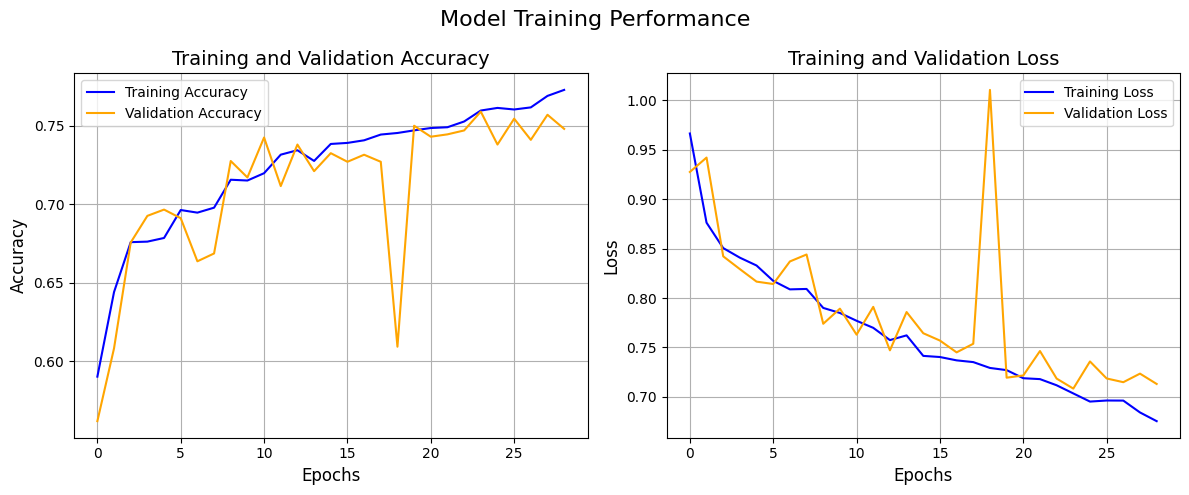

In [18]:
plt.figure(figsize=(12, 5))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

In [19]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.4f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7666 - loss: 0.6830
Test Accuracy: 0.7603


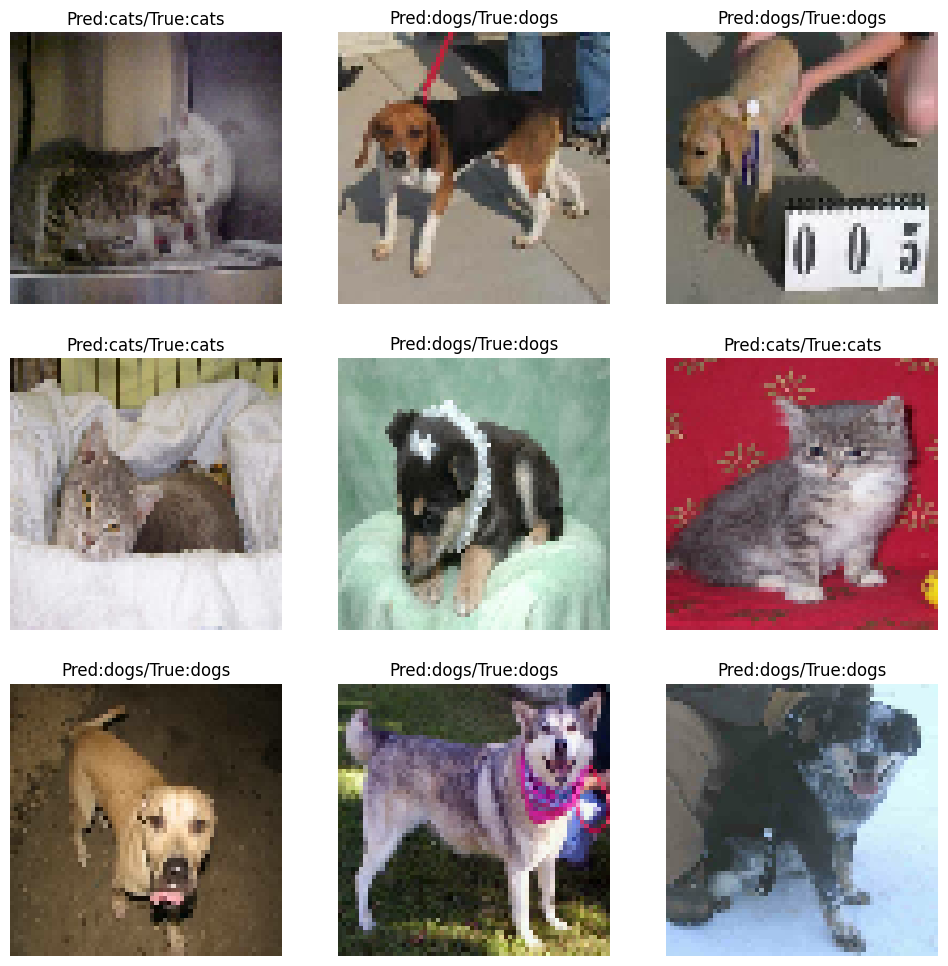

In [20]:
from tensorflow.keras.preprocessing import image

plt.figure(figsize=(12, 12))

for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # prepocess photo
        img_x = tf.expand_dims(images[i], axis=0)  # Добавляем batch dimension
        
        # predict
        result = model.predict(img_x, verbose=False)
        prediction = class_names[0 if result[0][0] < 0.5 else 1]
        
        plt.title(f"Pred:{prediction}/True:{class_names[labels[i]]}")
        plt.axis("off")

plt.show()